<a href="https://colab.research.google.com/github/krisanndesiderio/SYSTEM-TRON/blob/main/COVID19_Case_Surveillance_Public_Use_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COVID19-case Surveillance Public Use Data

In [8]:
import numpy as np
import pandas as pd
from google.colab import files
import io
import matplotlib.pyplot as plt
from google.colab import data_table

In [9]:
url = 'https://raw.githubusercontent.com/krisanndesiderio/SYSTEM-TRON/main/owid-covid-data.csv'

In [10]:
dataset = pd.read_csv(url)

In [11]:
dataset.head(600)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,CHN,Asia,China,22/01/2020,547,NaN,NaN,17.0,NaN,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
1,CHN,Asia,China,23/01/2020,639,92.0,NaN,18.0,1.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
2,CHN,Asia,China,24/01/2020,916,277.0,NaN,26.0,8.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
3,CHN,Asia,China,25/01/2020,1399,483.0,NaN,42.0,16.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
4,CHN,Asia,China,26/01/2020,2062,663.0,NaN,56.0,14.0,NaN,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,CHN,Asia,China,08/09/2021,106102,39.0,41.000,4636.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
596,CHN,Asia,China,09/09/2021,106125,23.0,37.714,4636.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
597,CHN,Asia,China,10/09/2021,106170,45.0,37.571,4636.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
598,CHN,Asia,China,11/09/2021,106232,62.0,40.286,4636.0,0.0,0.0,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN


Data Cleaning

Checking Nulls



In [12]:
dataset.isnull().sum()

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
human_development_index                       0
excess_mortality_cumulative_absolute       2529
excess_mortality_cumulative                2529
excess_mortality                           2529
excess_mortality_cumulative_per_million    2529
Length: 67, dtype: int64

Removing column

In [13]:
dataset.drop(['iso_code'], axis = 1, inplace=True)
dataset.drop(['new_cases_smoothed'], axis = 1, inplace=True)
dataset.drop(['new_deaths_smoothed'], axis = 1, inplace=True)
dataset.drop(['reproduction_rate'], axis = 1, inplace=True)
dataset.drop(['continent'], axis = 1, inplace=True)
dataset.head(600)

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,China,22/01/2020,547,NaN,17.0,NaN,0.379,NaN,NaN,0.012,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
1,China,23/01/2020,639,92.0,18.0,1.0,0.442,0.064,NaN,0.012,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
2,China,24/01/2020,916,277.0,26.0,8.0,0.634,0.192,NaN,0.018,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
3,China,25/01/2020,1399,483.0,42.0,16.0,0.969,0.334,NaN,0.029,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
4,China,26/01/2020,2062,663.0,56.0,14.0,1.428,0.459,NaN,0.039,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,China,08/09/2021,106102,39.0,4636.0,0.0,73.467,0.027,0.028,3.210,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
596,China,09/09/2021,106125,23.0,4636.0,0.0,73.483,0.016,0.026,3.210,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
597,China,10/09/2021,106170,45.0,4636.0,0.0,73.514,0.031,0.026,3.210,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
598,China,11/09/2021,106232,62.0,4636.0,0.0,73.557,0.043,0.028,3.210,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN


Data Visualization

Scatter Graph

Scatter Plot

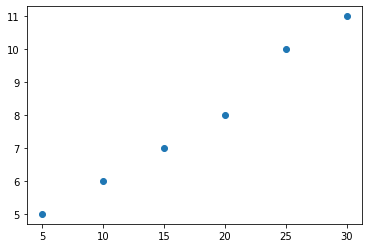

In [ ]:
import matplotlib.pyplot as plt


x=[5,10,15,20,25,30]
y=[5,6,7,8,10,11]

plt.scatter(x,y)

Line Graph

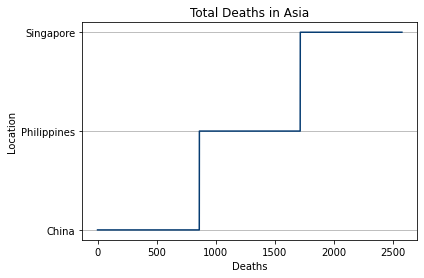

In [37]:
a = np.array(dataset['total_deaths'])
a = np.array(dataset['location'])


plt.ticklabel_format(style='plain')
plt.plot(a, c='#063c72')
plt.title("Total Deaths in Asia")
plt.xlabel("Deaths")
plt.ylabel("Location")
plt.grid(axis='y')

plt.show()

Pie Chart

([<matplotlib.patches.Wedge at 0x7fb283d82210>,
 [Text(0.03387456239334465, 1.0994782917468902, 'Singapore'),
  Text(-0.6076014382723892, -0.9169626449367085, 'Philippines'),
  Text(0.9352388955464416, -0.5790753044786769, 'China')])

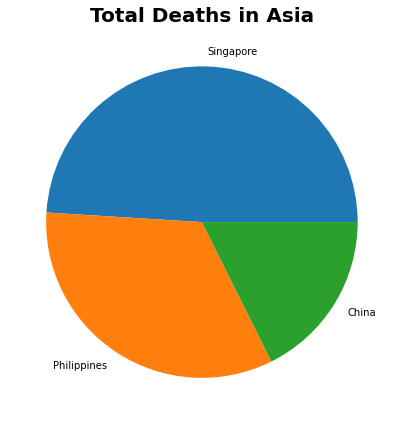

In [48]:
import matplotlib.pyplot as plt

location = "Singapore","Philippines","China"

f = plt.figure(tight_layout=True)
f.set_figwidth(10)
f.set_figheight(6)

plt.title("Total Deaths in Asia", fontweight="bold", fontsize=20)
amount = [2500, 1700,900]

plt.pie (amount, labels=location)

Histogram

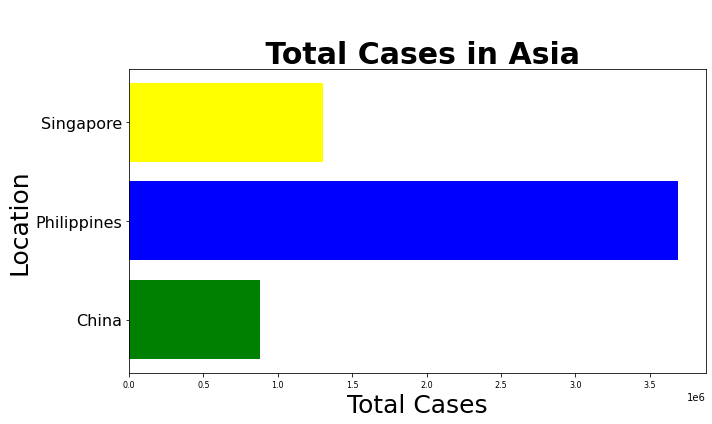

In [29]:
Country = dataset["location"]
TotalCases = dataset["total_cases"]

f = plt.figure(tight_layout=True)
f.set_figwidth(10)
f.set_figheight(6)

plt.xticks(fontsize=8)
plt.yticks(fontsize=16)
plt.ylabel("Location", fontsize= 25)
plt.xlabel("Total Cases", fontsize= 25)
plt.title("\n Total Cases in Asia", fontweight="bold", fontsize=30)
colors = ['yellow', 'green', 'yellow', 'green', 'yellow', 'blue']
plt.barh(Country, TotalCases, color = colors )
plt.show()
